In [1]:
import pandas as pd
import numpy as np

Reading the entire daily dataset

In [2]:
energy = pd.read_csv(r"D:\VIT\Semester-7 (Fall)\CSE1901 - Capstone Project\Code\EDA and Modelling\energy_total.csv")
energy.drop(energy.columns[[0]], axis=1, inplace=True)
energy

,day,LCLid,energy_sum
0,2012-10-12,MAC000002,7.098
1,2012-10-13,MAC000002,11.087
2,2012-10-14,MAC000002,13.223
3,2012-10-15,MAC000002,10.257
4,2012-10-16,MAC000002,9.769
...,...,...,...
3510428,2014-02-24,MAC004828,2.587
3510429,2014-02-25,MAC004828,0.720
3510430,2014-02-26,MAC004828,1.051
3510431,2014-02-27,MAC004828,0.736


In [3]:
energy['day'] = pd.to_datetime(energy['day'],format='%Y-%m-%d').dt.date
energy

,day,LCLid,energy_sum
0,2012-10-12,MAC000002,7.098
1,2012-10-13,MAC000002,11.087
2,2012-10-14,MAC000002,13.223
3,2012-10-15,MAC000002,10.257
4,2012-10-16,MAC000002,9.769
...,...,...,...
3510428,2014-02-24,MAC004828,2.587
3510429,2014-02-25,MAC004828,0.720
3510430,2014-02-26,MAC004828,1.051
3510431,2014-02-27,MAC004828,0.736


Adding necessary weather columns

In [4]:
weather = pd.read_csv("D:\VIT\Semester-7 (Fall)\CSE1901 - Capstone Project\Dataset\weather_daily_darksky.csv")
weather.head()

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,...,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,11.96,2011-11-11 23:00:00,123,fog,9.40,2011-11-11 07:00:00,0.79,3.88,1016.08,2011-11-11 07:00:00,...,10.87,2011-11-11 07:12:14,2011-11-11 19:00:00,2011-11-11 11:00:00,Foggy until afternoon.,2011-11-11 19:00:00,6.48,2011-11-11 23:00:00,2011-11-11 19:00:00,0.52
1,8.59,2011-12-11 14:00:00,198,partly-cloudy-day,4.49,2011-12-11 01:00:00,0.56,3.94,1007.71,2011-12-11 02:00:00,...,8.59,2011-12-11 07:57:02,2011-12-11 14:00:00,2011-12-11 12:00:00,Partly cloudy throughout the day.,2011-12-12 07:00:00,0.11,2011-12-11 20:00:00,2011-12-12 08:00:00,0.53
2,10.33,2011-12-27 02:00:00,225,partly-cloudy-day,5.47,2011-12-27 23:00:00,0.85,3.54,1032.76,2011-12-27 22:00:00,...,10.33,2011-12-27 08:07:06,2011-12-27 14:00:00,2011-12-27 00:00:00,Mostly cloudy throughout the day.,2011-12-27 23:00:00,5.59,2011-12-27 02:00:00,2011-12-28 00:00:00,0.10
3,8.07,2011-12-02 23:00:00,232,wind,3.69,2011-12-02 07:00:00,0.32,3.00,1012.12,2011-12-02 07:00:00,...,7.36,2011-12-02 07:46:09,2011-12-02 12:00:00,2011-12-02 10:00:00,Partly cloudy throughout the day and breezy ov...,2011-12-02 19:00:00,0.46,2011-12-02 12:00:00,2011-12-02 19:00:00,0.25
4,8.22,2011-12-24 23:00:00,252,partly-cloudy-night,2.79,2011-12-24 07:00:00,0.37,4.46,1028.17,2011-12-24 07:00:00,...,7.93,2011-12-24 08:06:15,2011-12-24 15:00:00,2011-12-24 13:00:00,Mostly cloudy throughout the day.,2011-12-24 19:00:00,-0.51,2011-12-24 23:00:00,2011-12-24 20:00:00,0.99


In [5]:
weather['day']=  pd.to_datetime(weather['time'])
weather['day']=  pd.to_datetime(weather['day'],format='%Y%m%d').dt.date
weather = weather[['temperatureMax', 'windSpeed', 'humidity', 'day']]
weather = weather.dropna()
weather

,temperatureMax,windSpeed,humidity,day
0,11.96,3.88,0.95,2011-11-11
1,8.59,3.94,0.88,2011-12-11
2,10.33,3.54,0.74,2011-12-27
3,8.07,3.00,0.87,2011-12-02
4,8.22,4.46,0.80,2011-12-24
...,...,...,...,...
877,9.03,4.55,0.79,2014-01-26
878,10.31,4.14,0.74,2014-02-27
879,18.97,2.78,0.58,2014-03-09
880,8.83,7.24,0.75,2014-02-12


In [6]:
weather_energy =  energy.merge(weather,on='day')
weather_energy

,day,LCLid,energy_sum,temperatureMax,windSpeed,humidity
0,2012-10-12,MAC000002,7.098,11.53,2.18,0.84
1,2012-10-12,MAC000246,17.245,11.53,2.18,0.84
2,2012-10-12,MAC000450,91.267,11.53,2.18,0.84
3,2012-10-12,MAC001074,23.145,11.53,2.18,0.84
4,2012-10-12,MAC003223,15.783,11.53,2.18,0.84
...,...,...,...,...,...,...
3506313,2011-11-27,MAC000154,8.905,13.54,5.48,0.72
3506314,2011-11-27,MAC000166,11.077,13.54,5.48,0.72
3506315,2011-11-27,MAC000174,30.298,13.54,5.48,0.72
3506316,2011-11-27,MAC000162,3.500,13.54,5.48,0.72


Adding holiday column

In [7]:
holiday = pd.read_csv(r"D:\VIT\Semester-7 (Fall)\CSE1901 - Capstone Project\Dataset\uk_bank_holidays.csv")
holiday['Bank holidays'] = pd.to_datetime(holiday['Bank holidays'],format='%Y-%m-%d').dt.date
holiday.head()

,Bank holidays,Type
0,2012-12-26,Boxing Day
1,2012-12-25,Christmas Day
2,2012-08-27,Summer bank holiday
3,2012-05-06,Queen?s Diamond Jubilee (extra bank holiday)
4,2012-04-06,Spring bank holiday (substitute day)


In [8]:
weather_energy = weather_energy.merge(holiday, left_on='day', right_on='Bank holidays', how='left')
weather_energy['holiday_ind'] = np.where(weather_energy['Bank holidays'].isna(),0,1)
weather_energy

,day,LCLid,energy_sum,temperatureMax,windSpeed,humidity,Bank holidays,Type,holiday_ind
0,2012-10-12,MAC000002,7.098,11.53,2.18,0.84,NaN,NaN,0
1,2012-10-12,MAC000246,17.245,11.53,2.18,0.84,NaN,NaN,0
2,2012-10-12,MAC000450,91.267,11.53,2.18,0.84,NaN,NaN,0
3,2012-10-12,MAC001074,23.145,11.53,2.18,0.84,NaN,NaN,0
4,2012-10-12,MAC003223,15.783,11.53,2.18,0.84,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...
3506313,2011-11-27,MAC000154,8.905,13.54,5.48,0.72,NaN,NaN,0
3506314,2011-11-27,MAC000166,11.077,13.54,5.48,0.72,NaN,NaN,0
3506315,2011-11-27,MAC000174,30.298,13.54,5.48,0.72,NaN,NaN,0
3506316,2011-11-27,MAC000162,3.500,13.54,5.48,0.72,NaN,NaN,0


In [9]:
weather_energy['holiday_ind'] = weather_energy.apply(lambda row: row['day'].weekday(), axis=1)
weather_energy['holiday_ind'] = (weather_energy['holiday_ind'] >= 5).astype(int)
weather_energy

,day,LCLid,energy_sum,temperatureMax,windSpeed,humidity,Bank holidays,Type,holiday_ind
0,2012-10-12,MAC000002,7.098,11.53,2.18,0.84,NaN,NaN,0
1,2012-10-12,MAC000246,17.245,11.53,2.18,0.84,NaN,NaN,0
2,2012-10-12,MAC000450,91.267,11.53,2.18,0.84,NaN,NaN,0
3,2012-10-12,MAC001074,23.145,11.53,2.18,0.84,NaN,NaN,0
4,2012-10-12,MAC003223,15.783,11.53,2.18,0.84,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...
3506313,2011-11-27,MAC000154,8.905,13.54,5.48,0.72,NaN,NaN,1
3506314,2011-11-27,MAC000166,11.077,13.54,5.48,0.72,NaN,NaN,1
3506315,2011-11-27,MAC000174,30.298,13.54,5.48,0.72,NaN,NaN,1
3506316,2011-11-27,MAC000162,3.500,13.54,5.48,0.72,NaN,NaN,1


In [10]:
weather_energy = weather_energy.drop(['Bank holidays', 'Type'], axis=1)
weather_energy

,day,LCLid,energy_sum,temperatureMax,windSpeed,humidity,holiday_ind
0,2012-10-12,MAC000002,7.098,11.53,2.18,0.84,0
1,2012-10-12,MAC000246,17.245,11.53,2.18,0.84,0
2,2012-10-12,MAC000450,91.267,11.53,2.18,0.84,0
3,2012-10-12,MAC001074,23.145,11.53,2.18,0.84,0
4,2012-10-12,MAC003223,15.783,11.53,2.18,0.84,0
...,...,...,...,...,...,...,...
3506313,2011-11-27,MAC000154,8.905,13.54,5.48,0.72,1
3506314,2011-11-27,MAC000166,11.077,13.54,5.48,0.72,1
3506315,2011-11-27,MAC000174,30.298,13.54,5.48,0.72,1
3506316,2011-11-27,MAC000162,3.500,13.54,5.48,0.72,1


In [11]:
weather_energy.nunique()

day                  827
LCLid               5566
energy_sum        410427
temperatureMax       678
windSpeed            456
humidity              49
holiday_ind            2
dtype: int64

Making a dataset of unique LCLids having average of all other parameters

In [12]:
daycount = weather_energy.groupby('LCLid')[['day']].nunique()
daycount

,day
LCLid,
MAC000002,503
MAC000003,738
MAC000004,660
MAC000005,636
MAC000006,759
...,...
MAC005563,1
MAC005564,575
MAC005565,3


<AxesSubplot:xlabel='LCLid'>

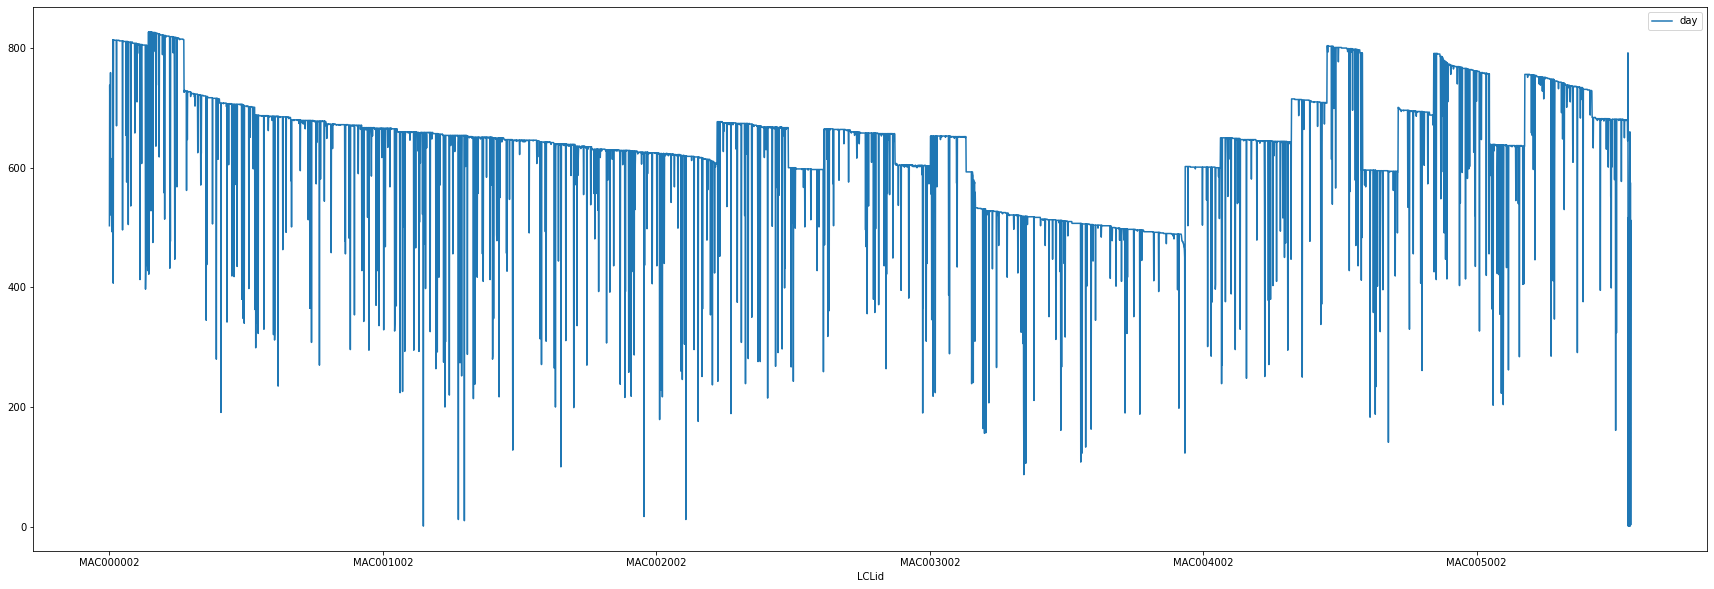

In [13]:
daycount.plot(figsize=(30,10))

In [14]:
daycount.nlargest(30, ['day'])

,day
LCLid,
MAC000145,827
MAC000147,827
MAC000148,827
MAC000149,827
MAC000150,827
MAC000151,827
MAC000152,827
MAC000153,827
MAC000155,827


In [15]:
# house_df = pd.DataFrame(columns = ["LCLid", "energy_avg", "temp_avg", "windspeed_avg", "humidity_avg", "holiday_avg"])

In [16]:
house_df = weather_energy.groupby('LCLid')
house_avg = house_df.mean()
house_avg

,energy_sum,temperatureMax,windSpeed,humidity,holiday_ind
LCLid,,,,,
MAC000002,12.045565,12.906012,3.676151,0.786746,0.283730
MAC000003,19.041507,14.297000,3.542851,0.777027,0.283784
MAC000004,1.691726,14.465552,3.601755,0.778109,0.282905
MAC000005,4.564345,14.301994,3.617174,0.780063,0.284144
MAC000006,2.848296,14.030447,3.526439,0.777201,0.283837
...,...,...,...,...,...
MAC005563,NaN,7.440000,4.020000,0.920000,0.000000
MAC005564,4.003516,13.748559,3.616215,0.782431,0.282986
MAC005565,2.895000,14.683333,4.603333,0.846667,0.000000


In [17]:
weather_energy[weather_energy["energy_sum"].isna()]

,day,LCLid,energy_sum,temperatureMax,windSpeed,humidity,holiday_ind
362510,2012-12-18,MAC005062,NaN,7.96,2.17,0.86,0
362723,2012-12-18,MAC000619,NaN,7.96,2.17,0.86,0
362742,2012-12-18,MAC002155,NaN,7.96,2.17,0.86,0
362763,2012-12-18,MAC005370,NaN,7.96,2.17,0.86,0
362865,2012-12-18,MAC000393,NaN,7.96,2.17,0.86,0
362883,2012-12-18,MAC002014,NaN,7.96,2.17,0.86,0
363241,2012-12-18,MAC001957,NaN,7.96,2.17,0.86,0
363978,2012-12-18,MAC001333,NaN,7.96,2.17,0.86,0
364439,2012-12-18,MAC001633,NaN,7.96,2.17,0.86,0
364868,2012-12-18,MAC001300,NaN,7.96,2.17,0.86,0


In [19]:
house_avg = house_avg.dropna()
house_avg

,energy_sum,temperatureMax,windSpeed,humidity,holiday_ind
LCLid,,,,,
MAC000002,12.045565,12.906012,3.676151,0.786746,0.283730
MAC000003,19.041507,14.297000,3.542851,0.777027,0.283784
MAC000004,1.691726,14.465552,3.601755,0.778109,0.282905
MAC000005,4.564345,14.301994,3.617174,0.780063,0.284144
MAC000006,2.848296,14.030447,3.526439,0.777201,0.283837
...,...,...,...,...,...
MAC005562,10.438841,14.462224,3.599138,0.778336,0.281392
MAC005564,4.003516,13.748559,3.616215,0.782431,0.282986
MAC005565,2.895000,14.683333,4.603333,0.846667,0.000000


In [20]:
house_avg[house_avg["energy_sum"].isna()]

,energy_sum,temperatureMax,windSpeed,humidity,holiday_ind
LCLid,,,,,


In [21]:
house_avg.rename(columns = {"energy_sum":"energy_avg", "temperatureMax":"temp_avg", "windSpeed":"windspeed_avg", "humidity":"humidity_avg", "holiday_ind":"holiday_avg"}, inplace=True)
house_avg

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,energy_avg,temp_avg,windspeed_avg,humidity_avg,holiday_avg
LCLid,,,,,
MAC000002,12.045565,12.906012,3.676151,0.786746,0.283730
MAC000003,19.041507,14.297000,3.542851,0.777027,0.283784
MAC000004,1.691726,14.465552,3.601755,0.778109,0.282905
MAC000005,4.564345,14.301994,3.617174,0.780063,0.284144
MAC000006,2.848296,14.030447,3.526439,0.777201,0.283837
...,...,...,...,...,...
MAC005562,10.438841,14.462224,3.599138,0.778336,0.281392
MAC005564,4.003516,13.748559,3.616215,0.782431,0.282986
MAC005565,2.895000,14.683333,4.603333,0.846667,0.000000


In [23]:
house_avg.to_csv(r"D:\VIT\Semester-7 (Fall)\CSE1901 - Capstone Project\Code\08-03-2023 Final load forecasting\1_house_avg.csv")